In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Mestrado/modelagem/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mestrado/modelagem


In [1]:
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler, scale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
csv = pd.read_csv("Datasets/chemometrics.csv", sep=';', index_col='Unnamed: 0')
csv

,PIE,PIF,DGR,SAC,MR,Lam,Vol,DDGTS
Ala,0.23,0.31,-0.55,254.2,2.126,-0.02,82.2,8.5
Asn,-0.48,-0.60,0.51,303.6,2.994,-1.24,112.3,8.2
Asp,-0.61,-0.77,1.20,287.9,2.994,-1.08,103.7,8.5
Cys,0.45,1.54,-1.40,282.9,2.933,-0.11,99.1,11.0
Gln,-0.11,-0.22,0.29,335.0,3.458,-1.19,127.5,6.3
Glu,-0.51,-0.64,0.76,311.6,3.243,-1.43,120.5,8.8
Gly,0.00,0.00,0.00,224.9,1.662,0.03,65.0,7.1
His,0.15,0.13,-0.25,337.2,3.856,-1.06,140.6,10.1
Ile,1.20,1.80,-2.10,322.6,3.350,0.04,131.7,16.8
Leu,1.28,1.70,-2.00,324.0,3.518,0.12,131.5,15.0


In [4]:
# Este Scaler remove a mediana e dimensiona os dados de acordo com o intervalo quantil. 
# O IQR é o intervalo entre o 1º quartil (25º quantil) e o 3º quartil (75º quantil).
# A centralização e o dimensionamento acontecem independentemente em cada recurso, calculando as estatísticas 
# relevantes nas amostras no conjunto de treinamento. A mediana e o intervalo interquartil são então armazenados para 
# serem usados em dados posteriores usando o método de transformação.

transformer = RobustScaler().fit(csv.iloc[:,1:])
X = transformer.transform(csv.iloc[:,1:])
data = pd.DataFrame(X, columns=csv.columns[1:])
data.insert(0, "Unnamed: 0", csv.iloc[:, 0], True)
csv = data
csv

,Unnamed: 0,PIE,PIF,DGR,SAC,MR,Lam,Vol,DDGTS
0,Ala,0.000000,0.000000,0.016304,-1.135509,-1.185942,0.313131,-1.198748,-0.103448
1,Asn,-0.747368,-0.600660,0.592391,-0.158259,-0.076677,-0.919192,-0.256651,-0.206897
2,Asp,-0.884211,-0.712871,0.967391,-0.468843,-0.076677,-0.757576,-0.525822,-0.103448
3,Cys,0.231579,0.811881,-0.445652,-0.567755,-0.154633,0.222222,-0.669797,0.758621
4,Gln,-0.357895,-0.349835,0.472826,0.462908,0.516294,-0.868687,0.219092,-0.862069
5,Glu,-0.778947,-0.627063,0.728261,0.000000,0.241534,-1.111111,0.000000,0.000000
6,Gly,-0.242105,-0.204620,0.315217,-1.715134,-1.778914,0.363636,-1.737089,-0.586207
7,His,-0.084211,-0.118812,0.179348,0.506429,1.024920,-0.737374,0.629108,0.448276
8,Ile,1.021053,0.983498,-0.826087,0.217606,0.378275,0.373737,0.350548,2.758621
9,Leu,1.105263,0.917492,-0.771739,0.245302,0.592971,0.454545,0.344288,2.137931


In [5]:
X = csv.iloc[:,1:-1].values
y = csv["DDGTS"].values

Suggested number of components:  2


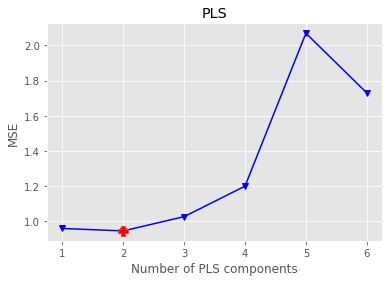

R2 calib: 0.455
R2 CV: -0.105
MSE calib: 0.467
MSE CV: 0.946


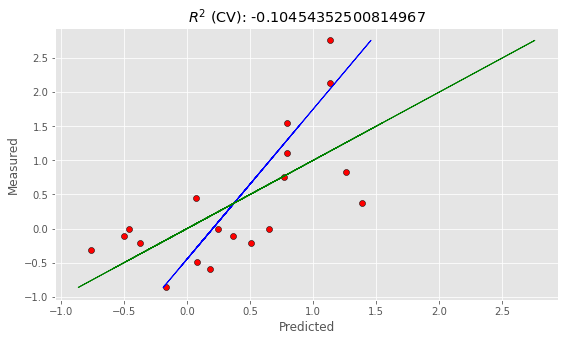

In [6]:
n_comp = X[0].size
mse = []
component = np.arange(1, n_comp)
 
for i in component:
  pls = PLS(n_components=i)
  # Cross-validation
  y_cv = cross_val_predict(pls, X, y, cv=10)
  mse.append(mean_squared_error(y, y_cv))
 
# Calculate and print the position of minimum in MSE
msemin = np.argmin(mse)
print("Suggested number of components: ", msemin+1)

with plt.style.context(('ggplot')):
  plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
  plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
  plt.xlabel('Number of PLS components')
  plt.ylabel('MSE')
  plt.title('PLS')
  plt.show()
 
# Define PLS object with optimal number of components
pls = PLS(n_components=msemin+1)
 
# Fir to the entire dataset
pls.fit(X, y)
y_c = pls.predict(X)
 
# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
 
# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)

# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)

print('R2 calib: %5.3f'  % score_c)
print('R2 CV: %5.3f'  % score_cv)
print('MSE calib: %5.3f' % mse_c)
print('MSE CV: %5.3f' % mse_cv)

# Plot regression and figures of merit
rangey = max(y) - min(y)
rangex = max(y_c) - min(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y, y_c, 1)
with plt.style.context(('ggplot')):
  fig, ax = plt.subplots(figsize=(9, 5))
  ax.scatter(y_c, y, c='red', edgecolors='k')
  #Plot the best fit line
  ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
   #Plot the ideal 1:1 line
  ax.plot(y, y, color='green', linewidth=1)
  plt.title('$R^{2}$ (CV): '+str(score_cv))
  plt.xlabel('Predicted')
  plt.ylabel('Measured')

  plt.show()

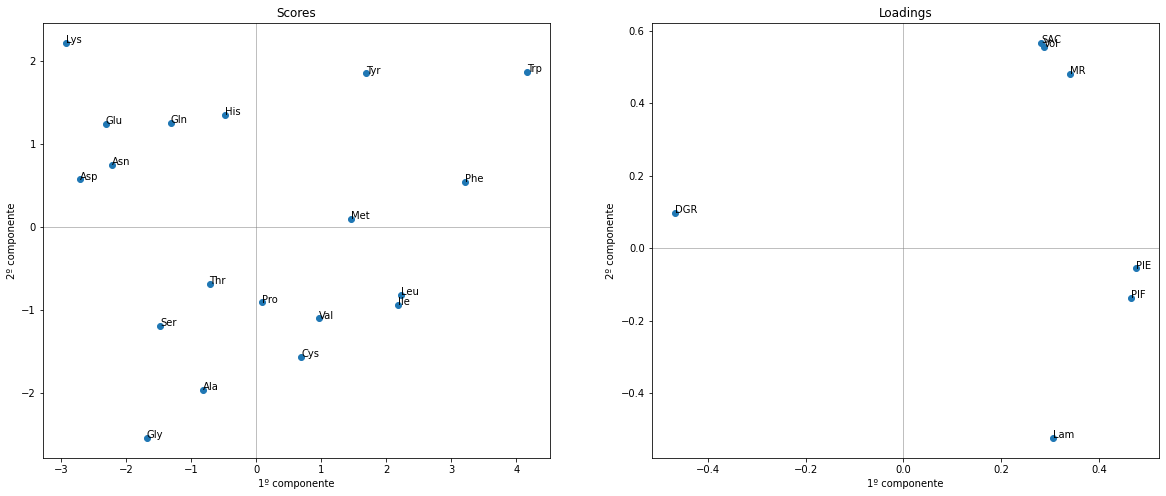

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

# Gráfico dos scores
priComp = [t[0] for t in pls.x_scores_]
segComp = [t[1] for t in pls.x_scores_]

ax[0].axhline(color='gray', linewidth=0.5)
ax[0].axvline(color='gray', linewidth=0.5)
ax[0].scatter(priComp, segComp)
ax[0].set_title("Scores")
ax[0].set_xlabel("1º componente")
ax[0].set_ylabel("2º componente")

i = 0;
labels = csv.iloc[:, 0].values
for l in pls.x_scores_:
  ax[0].text(x=l[0], y=l[1], s=labels[i])
  i += 1

# Gráfico dos loadings
priComp = [t[0] for t in pls.x_loadings_]
segComp = [t[1] for t in pls.x_loadings_]

ax[1].axhline(color='gray', linewidth=0.5)
ax[1].axvline(color='gray', linewidth=0.5)
ax[1].scatter(priComp, segComp)
ax[1].set_title("Loadings")
ax[1].set_xlabel("1º componente")
ax[1].set_ylabel("2º componente")

i = 1;
labels = csv.columns
for l in pls.x_loadings_:
  plt.text(x=l[0], y=l[1], s=csv.columns[i])
  i += 1

plt.show()